In [47]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

In [48]:
#load the dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [49]:
#Read the first 5 lines of the data set
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [50]:
#Read the last 5 lines
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [51]:
#Get the shape of the data set
df.shape

(5110, 12)

In [54]:
#Analyze the dataset
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [55]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [56]:
df.dropna(inplace = True)

In [57]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [58]:
df = df.drop(['id'], axis=1)

In [59]:
le = LabelEncoder()

for x in df.select_dtypes(include = 'object'):
    print(df[x].value_counts())
lable_data = df.loc[:,['gender','ever_married','work_type', 'Residence_type','smoking_status']]

for x in lable_data.columns:
    lable_data[x] = le.fit_transform(lable_data[x])    
    
for x in lable_data.columns:
    df[x] = lable_data[x]  

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64
Yes    3204
No     1705
Name: ever_married, dtype: int64
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64
Urban    2490
Rural    2419
Name: Residence_type, dtype: int64
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64


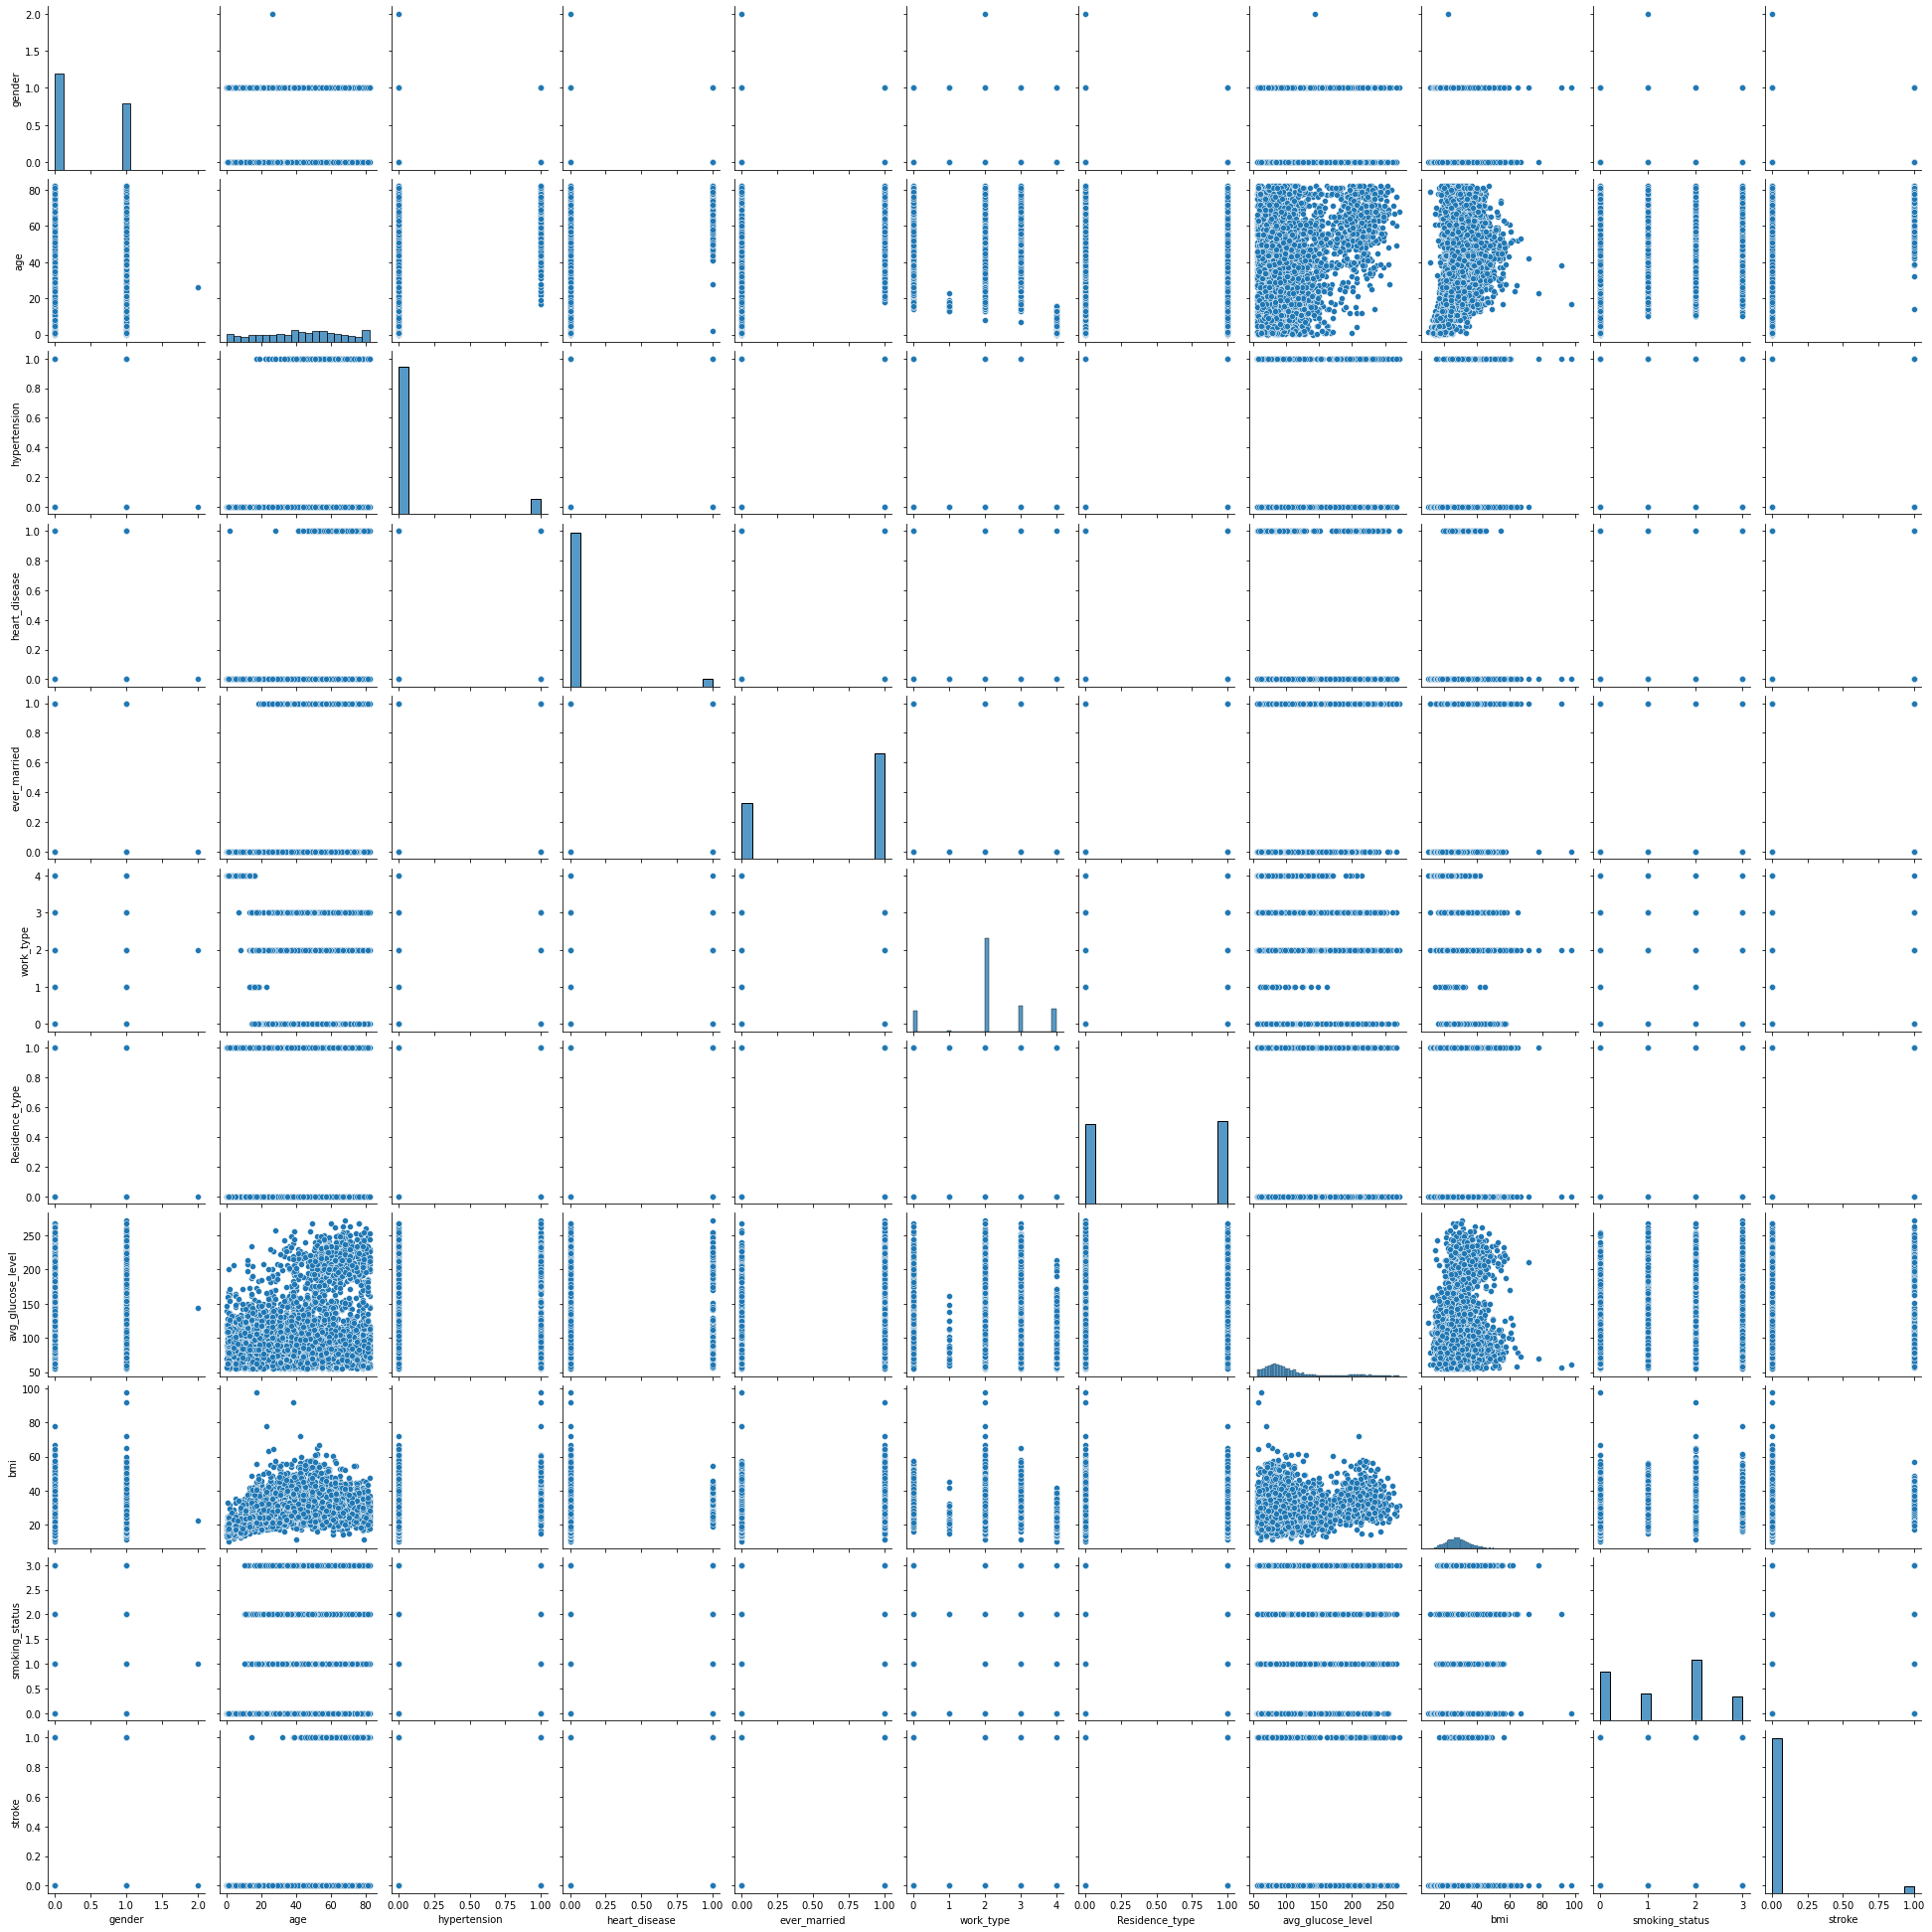

In [60]:
sns.pairplot(df)

In [61]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.030738,0.021578,0.082712,-0.037237,0.058560,-0.005014,0.053664,-0.026678,-0.060004,0.006757
age,-0.030738,1.000000,0.274425,0.257123,0.680782,-0.366987,0.010948,0.235838,0.333398,0.275515,0.232331
hypertension,0.021578,0.274425,1.000000,0.115991,0.162406,-0.052750,-0.001074,0.180543,0.167811,0.110808,0.142515
heart_disease,0.082712,0.257123,0.115991,1.000000,0.111245,-0.030373,-0.002362,0.154525,0.041357,0.055236,0.137938
ever_married,-0.037237,0.680782,0.162406,0.111245,1.000000,-0.357946,0.004989,0.151377,0.341695,0.264642,0.105089
work_type,0.058560,-0.366987,-0.052750,-0.030373,-0.357946,1.000000,-0.005422,-0.050581,-0.304876,-0.310911,-0.033756
Residence_type,-0.005014,0.010948,-0.001074,-0.002362,0.004989,-0.005422,1.000000,-0.007617,-0.000122,0.013810,0.006031
avg_glucose_level,0.053664,0.235838,0.180543,0.154525,0.151377,-0.050581,-0.007617,1.000000,0.175502,0.066335,0.138936
bmi,-0.026678,0.333398,0.167811,0.041357,0.341695,-0.304876,-0.000122,0.175502,1.000000,0.224473,0.042374
smoking_status,-0.060004,0.275515,0.110808,0.055236,0.264642,-0.310911,0.013810,0.066335,0.224473,1.000000,0.051558


<AxesSubplot:>

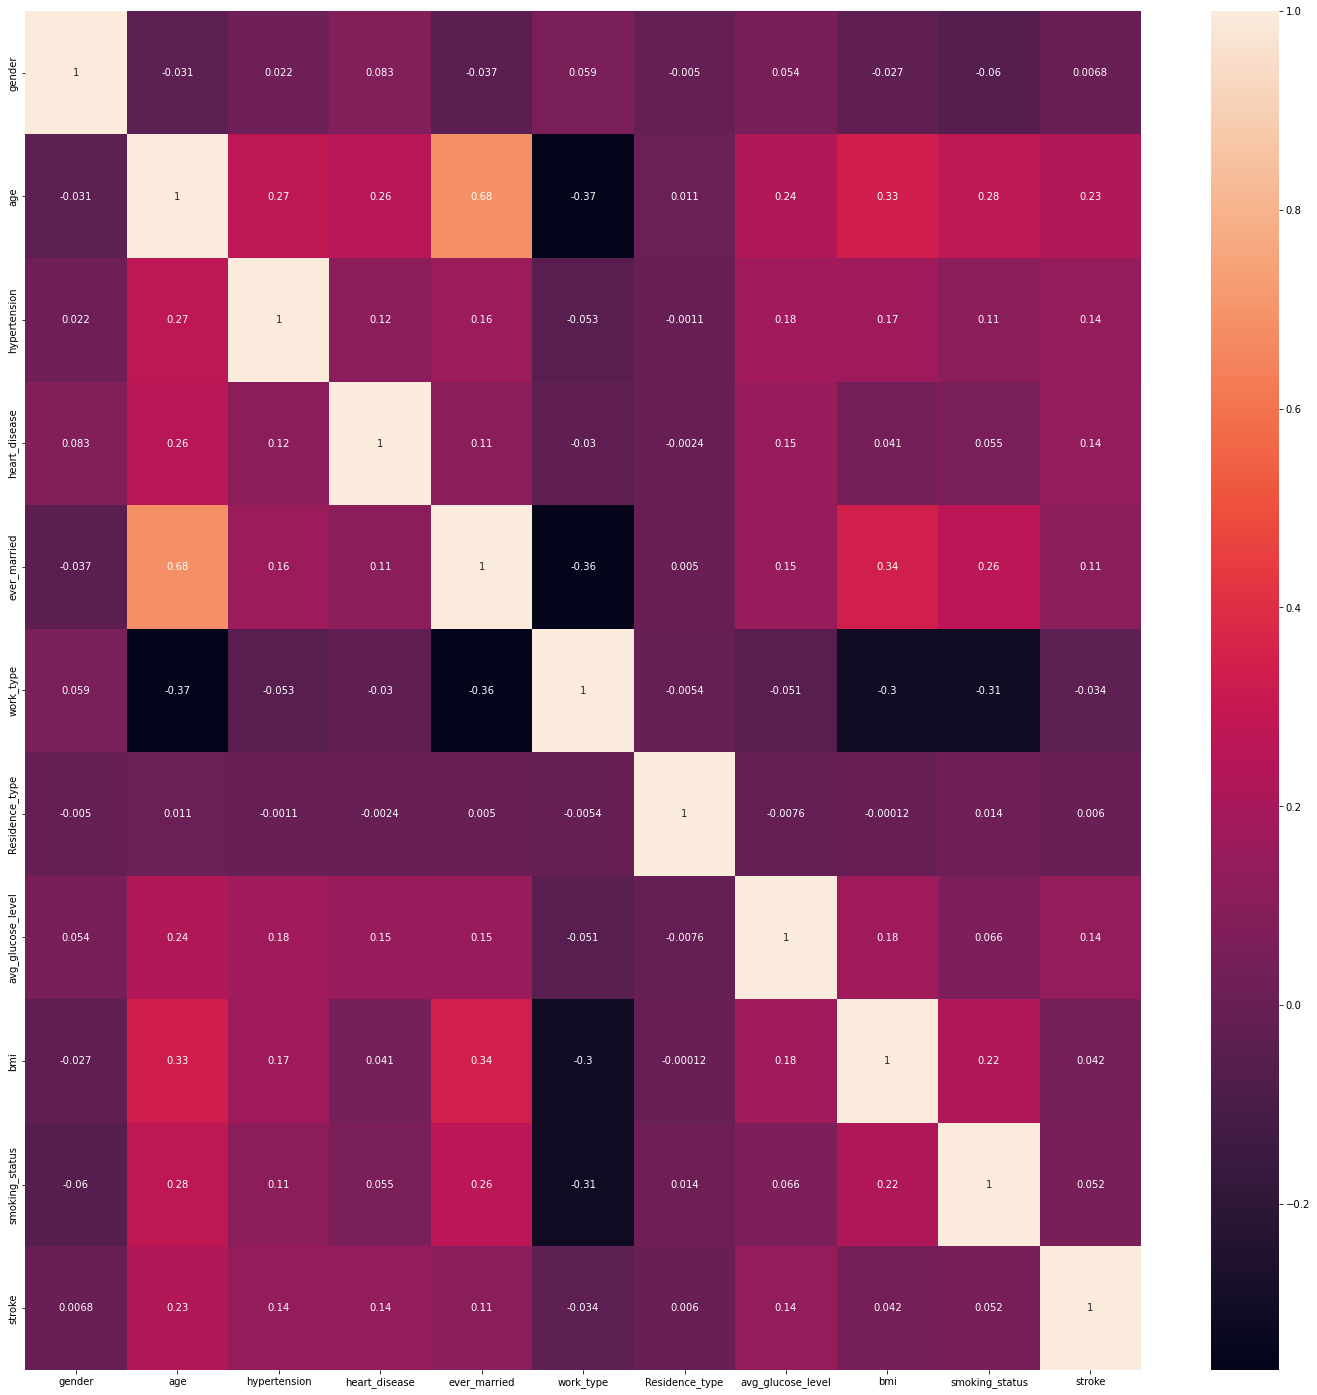

In [62]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True)


In [ ]:
x = df.drop(['stroke'], axis=1)
y = df['stroke']